Notebook to compare results between algorithms

Some functions and imports

In [1]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
from kerasmodel import *
rd.seed(0)
X_train, y_train, X_val, y_val, X_test, y_test=load_cifar()

50 evaluations

Reported score and parameters

Random Sampling

In [3]:
rd_params=load_obj("RandOptParam50")
rd_score=load_obj('RandScore50')
print("Random parameters: ",rd_params)
print("Random score: ",rd_score)

Random parameters:  {'nepochs': 8, 'learning_rate': 0.00025389607570355365, 'batch_size': 60.0, 'conv_size1': 45.0, 'conv_size2': 121.0, 'conv_size3': 96.0, 'fc_size': 194.0, 'dropout_param': 0.3631061092142125, 'l2_reg': 9.938375807860742e-05}
Random score:  0.7630000114440918


Particle swarm

In [4]:
ps_params=load_obj('PSOptParam50')
ps_score=load_obj('PSScore50')
print("Particle swarm parameters: ",ps_params)
print("Particle swarm score: ",ps_score)

Particle swarm parameters:  {'nepochs': 8, 'learning_rate': 0.0007455347010972497, 'batch_size': 69.0, 'conv_size1': 57.0, 'conv_size2': 119.0, 'conv_size3': 98.0, 'fc_size': 177.0, 'dropout_param': 0.6, 'l2_reg': 1e-10}
Particle swarm score:  0.7799999713897705


Genetic algorithm

In [5]:
ga_params=load_obj('GAOptParam50')
ga_score=load_obj('GAScore50')
print("Genetic algorithm parameters: ",ga_params)
print("Genetic algorithm score: ",ga_score)

Genetic algorithm parameters:  {'nepochs': 8, 'learning_rate': 0.0009078561752333666, 'batch_size': 47.0, 'conv_size1': 82.0, 'conv_size2': 128.0, 'conv_size3': 87.0, 'fc_size': 50.0, 'dropout_param': 0.1455111252548922, 'l2_reg': 0.00020836552164249736}
Genetic algorithm score:  0.7720000147819519


Retrain models for more epochs to see which params behave better

Random model

In [6]:
rd.seed(0)
rd_params['nepochs']=15
rd_model=create_model(rd_params)
rd_valhistory=train_model(rd_model,rd_params,X_train, y_train, X_val, y_val)

Epoch 1/15
817/817 - 11s - loss: 1.4479 - sparse_categorical_accuracy: 0.5039 - val_loss: 1.1949 - val_sparse_categorical_accuracy: 0.6060
Epoch 2/15
817/817 - 11s - loss: 1.0522 - sparse_categorical_accuracy: 0.6445 - val_loss: 1.0005 - val_sparse_categorical_accuracy: 0.6660
Epoch 3/15
817/817 - 11s - loss: 0.9168 - sparse_categorical_accuracy: 0.6935 - val_loss: 0.9311 - val_sparse_categorical_accuracy: 0.6920
Epoch 4/15
817/817 - 11s - loss: 0.8330 - sparse_categorical_accuracy: 0.7227 - val_loss: 0.8954 - val_sparse_categorical_accuracy: 0.7080
Epoch 5/15
817/817 - 11s - loss: 0.7598 - sparse_categorical_accuracy: 0.7489 - val_loss: 0.8733 - val_sparse_categorical_accuracy: 0.7160
Epoch 6/15
817/817 - 11s - loss: 0.7050 - sparse_categorical_accuracy: 0.7692 - val_loss: 0.9389 - val_sparse_categorical_accuracy: 0.6950
Epoch 7/15
817/817 - 11s - loss: 0.6548 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.7603 - val_sparse_categorical_accuracy: 0.7570
Epoch 8/15
817/817 - 11s - 

In [7]:
rd_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7777 - sparse_categorical_accuracy: 0.7695


[0.7777013182640076, 0.7695000171661377]

Particle swarm model

In [8]:
rd.seed(0)
ps_params['nepochs']=15
ps_model=ToyNet(ps_params)
ps_valhistory=train_model(ps_model,ps_params,X_train, y_train, X_val, y_val)

Epoch 1/15
711/711 - 11s - loss: 1.4421 - sparse_categorical_accuracy: 0.4865 - val_loss: 1.1546 - val_sparse_categorical_accuracy: 0.5950
Epoch 2/15
711/711 - 11s - loss: 1.0196 - sparse_categorical_accuracy: 0.6390 - val_loss: 0.8944 - val_sparse_categorical_accuracy: 0.6900
Epoch 3/15
711/711 - 11s - loss: 0.8945 - sparse_categorical_accuracy: 0.6853 - val_loss: 0.8707 - val_sparse_categorical_accuracy: 0.6850
Epoch 4/15
711/711 - 11s - loss: 0.8157 - sparse_categorical_accuracy: 0.7126 - val_loss: 0.7764 - val_sparse_categorical_accuracy: 0.7240
Epoch 5/15
711/711 - 11s - loss: 0.7712 - sparse_categorical_accuracy: 0.7297 - val_loss: 0.7492 - val_sparse_categorical_accuracy: 0.7300
Epoch 6/15
711/711 - 11s - loss: 0.7282 - sparse_categorical_accuracy: 0.7452 - val_loss: 0.7268 - val_sparse_categorical_accuracy: 0.7430
Epoch 7/15
711/711 - 11s - loss: 0.6885 - sparse_categorical_accuracy: 0.7574 - val_loss: 0.7099 - val_sparse_categorical_accuracy: 0.7430
Epoch 8/15
711/711 - 11s - 

In [9]:
ps_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8015 - sparse_categorical_accuracy: 0.7409


[0.8015488982200623, 0.7408999800682068]

Genetic algorithm model

In [10]:
rd.seed(0)
ga_params['nepochs']=15
ga_model=ToyNet(ga_params)
ga_valhistory=train_model(ga_model,ga_params,X_train, y_train, X_val, y_val)

Epoch 1/15
1043/1043 - 13s - loss: 1.5180 - sparse_categorical_accuracy: 0.4770 - val_loss: 1.2840 - val_sparse_categorical_accuracy: 0.5410
Epoch 2/15
1043/1043 - 13s - loss: 1.0430 - sparse_categorical_accuracy: 0.6531 - val_loss: 1.0555 - val_sparse_categorical_accuracy: 0.6730
Epoch 3/15
1043/1043 - 13s - loss: 0.9108 - sparse_categorical_accuracy: 0.7057 - val_loss: 0.9945 - val_sparse_categorical_accuracy: 0.6780
Epoch 4/15
1043/1043 - 13s - loss: 0.8370 - sparse_categorical_accuracy: 0.7352 - val_loss: 0.9696 - val_sparse_categorical_accuracy: 0.7020
Epoch 5/15
1043/1043 - 13s - loss: 0.7860 - sparse_categorical_accuracy: 0.7578 - val_loss: 0.8978 - val_sparse_categorical_accuracy: 0.7290
Epoch 6/15
1043/1043 - 13s - loss: 0.7416 - sparse_categorical_accuracy: 0.7758 - val_loss: 0.9772 - val_sparse_categorical_accuracy: 0.7050
Epoch 7/15
1043/1043 - 13s - loss: 0.7076 - sparse_categorical_accuracy: 0.7907 - val_loss: 0.8593 - val_sparse_categorical_accuracy: 0.7620
Epoch 8/15
10

In [11]:
ga_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8873 - sparse_categorical_accuracy: 0.7709


[0.8872703909873962, 0.7709000110626221]

Generate validation accuracy history

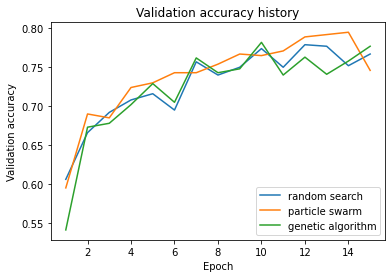

In [12]:
plt.figure()
plt.plot(np.arange(len(rd_valhistory))+1,rd_valhistory)
plt.plot(np.arange(len(ps_valhistory))+1,ps_valhistory)
plt.plot(np.arange(len(ga_valhistory))+1,ga_valhistory)
plt.legend(['random search','particle swarm','genetic algorithm'])
plt.title('Validation accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.savefig('ValHist_50.pdf')

Generate evolution graph

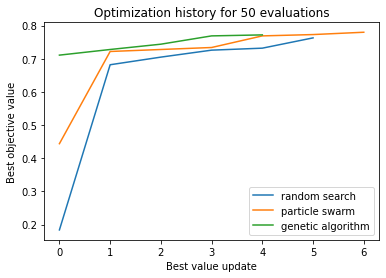

In [13]:
rd_history=load_obj('RandHistory50')
ps_history=load_obj('PSHistory50')
ga_history=load_obj('GAHistory50')

plt.figure()
plt.title('Optimization history for 50 evaluations')
plt.plot(np.arange(len(rd_history)),rd_history)
plt.plot(np.arange(len(ps_history)),ps_history)
plt.plot(np.arange(len(ga_history)),ga_history)
plt.xlabel('Best value update')
plt.ylabel('Best objective value')
plt.legend(['random search','particle swarm','genetic algorithm'])
plt.savefig('History_50.pdf')

200 evaluations

Reported score and parameters

Random sampling

In [14]:
rd_params=load_obj("RandOptParam200")
rd_score=load_obj('RandScore200')
print("Random parameters: ",rd_params)
print("Random score: ",rd_score)

Random parameters:  {'nepochs': 8, 'learning_rate': 0.000729797372809362, 'batch_size': 42.0, 'conv_size1': 68.0, 'conv_size2': 61.0, 'conv_size3': 72.0, 'fc_size': 156.0, 'dropout_param': 0.09557593783746465, 'l2_reg': 3.6940223582782394e-06}
Random score:  0.791


Particle swarm optimization

In [15]:
ps_params=load_obj('PSOptParam200')
ps_score=load_obj('PSScore200')
print("Particle swarm parameters: ",ps_params)
print("Particle swarm score: ",ps_score)

Particle swarm parameters:  {'nepochs': 8, 'learning_rate': 0.0017186961757780267, 'batch_size': 56.0, 'conv_size1': 32.0, 'conv_size2': 125.0, 'conv_size3': 61.0, 'fc_size': 145.0, 'dropout_param': 0.0, 'l2_reg': 1e-10}
Particle swarm score:  0.789


Genetic algorithm

In [16]:
ga_params=load_obj('GAOptParam200')
ga_score=load_obj('GAScore200')
print("Genetic algorithm parameters: ",ga_params)
print("Genetic algorithm score: ",ga_score)

Genetic algorithm parameters:  {'nepochs': 8, 'learning_rate': 0.001172468301071695, 'batch_size': 32.0, 'conv_size1': 107.0, 'conv_size2': 86.0, 'conv_size3': 109.0, 'fc_size': 160.0, 'dropout_param': 0.2617519889727094, 'l2_reg': 8.292267029306733e-09}
Genetic algorithm score:  0.8069999814033508


Retrain models for more epochs to see which params behave better

Random model

In [17]:
rd.seed(0)
rd_params['nepochs']=15
rd_model=create_model(rd_params)
rd_valhistory=train_model(rd_model,rd_params,X_train, y_train, X_val, y_val)

Epoch 1/15
1167/1167 - 9s - loss: 1.2759 - sparse_categorical_accuracy: 0.5495 - val_loss: 1.0684 - val_sparse_categorical_accuracy: 0.6190
Epoch 2/15
1167/1167 - 9s - loss: 0.8961 - sparse_categorical_accuracy: 0.6863 - val_loss: 0.8777 - val_sparse_categorical_accuracy: 0.6930
Epoch 3/15
1167/1167 - 9s - loss: 0.7718 - sparse_categorical_accuracy: 0.7306 - val_loss: 0.8092 - val_sparse_categorical_accuracy: 0.7230
Epoch 4/15
1167/1167 - 9s - loss: 0.6923 - sparse_categorical_accuracy: 0.7599 - val_loss: 0.8147 - val_sparse_categorical_accuracy: 0.7310
Epoch 5/15
1167/1167 - 9s - loss: 0.6260 - sparse_categorical_accuracy: 0.7820 - val_loss: 0.7582 - val_sparse_categorical_accuracy: 0.7490
Epoch 6/15
1167/1167 - 9s - loss: 0.5704 - sparse_categorical_accuracy: 0.8006 - val_loss: 0.7766 - val_sparse_categorical_accuracy: 0.7400
Epoch 7/15
1167/1167 - 9s - loss: 0.5186 - sparse_categorical_accuracy: 0.8191 - val_loss: 0.7348 - val_sparse_categorical_accuracy: 0.7560
Epoch 8/15
1167/1167

In [18]:
rd_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7541 - sparse_categorical_accuracy: 0.7767


[0.7541487812995911, 0.7767000198364258]

Particle swarm model

In [19]:
rd.seed(0)
ps_params['nepochs']=15
ps_model=ToyNet(ps_params)
ps_valhistory=train_model(ps_model,ps_params,X_train, y_train, X_val, y_val)

Epoch 1/15
875/875 - 9s - loss: 1.4384 - sparse_categorical_accuracy: 0.5047 - val_loss: 0.9934 - val_sparse_categorical_accuracy: 0.6590
Epoch 2/15
875/875 - 9s - loss: 0.9017 - sparse_categorical_accuracy: 0.6828 - val_loss: 0.9785 - val_sparse_categorical_accuracy: 0.6680
Epoch 3/15
875/875 - 9s - loss: 0.7621 - sparse_categorical_accuracy: 0.7332 - val_loss: 0.8281 - val_sparse_categorical_accuracy: 0.7110
Epoch 4/15
875/875 - 9s - loss: 0.6665 - sparse_categorical_accuracy: 0.7675 - val_loss: 0.7773 - val_sparse_categorical_accuracy: 0.7420
Epoch 5/15
875/875 - 9s - loss: 0.5954 - sparse_categorical_accuracy: 0.7918 - val_loss: 0.7925 - val_sparse_categorical_accuracy: 0.7400
Epoch 6/15
875/875 - 9s - loss: 0.5273 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.7170 - val_sparse_categorical_accuracy: 0.7580
Epoch 7/15
875/875 - 9s - loss: 0.4623 - sparse_categorical_accuracy: 0.8364 - val_loss: 0.7940 - val_sparse_categorical_accuracy: 0.7610
Epoch 8/15
875/875 - 9s - loss: 0.

In [20]:
ps_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0713 - sparse_categorical_accuracy: 0.7556


[1.071265697479248, 0.7555999755859375]

Genetic algorithm model

In [21]:
rd.seed(0)
ga_params['nepochs']=15
ga_model=ToyNet(ga_params)
ga_valhistory=train_model(ga_model,ga_params,X_train, y_train, X_val, y_val)

Epoch 1/15
1532/1532 - 14s - loss: 1.4029 - sparse_categorical_accuracy: 0.5044 - val_loss: 1.0656 - val_sparse_categorical_accuracy: 0.6500
Epoch 2/15
1532/1532 - 13s - loss: 0.9556 - sparse_categorical_accuracy: 0.6618 - val_loss: 0.9024 - val_sparse_categorical_accuracy: 0.6950
Epoch 3/15
1532/1532 - 13s - loss: 0.8213 - sparse_categorical_accuracy: 0.7082 - val_loss: 0.9231 - val_sparse_categorical_accuracy: 0.6830
Epoch 4/15
1532/1532 - 13s - loss: 0.7184 - sparse_categorical_accuracy: 0.7497 - val_loss: 0.7696 - val_sparse_categorical_accuracy: 0.7340
Epoch 5/15
1532/1532 - 13s - loss: 0.6431 - sparse_categorical_accuracy: 0.7756 - val_loss: 0.7541 - val_sparse_categorical_accuracy: 0.7380
Epoch 6/15
1532/1532 - 13s - loss: 0.5786 - sparse_categorical_accuracy: 0.7972 - val_loss: 0.7212 - val_sparse_categorical_accuracy: 0.7670
Epoch 7/15
1532/1532 - 13s - loss: 0.5236 - sparse_categorical_accuracy: 0.8154 - val_loss: 0.6482 - val_sparse_categorical_accuracy: 0.7780
Epoch 8/15
15

In [22]:
ga_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7580 - sparse_categorical_accuracy: 0.7886


[0.7580143809318542, 0.7886000275611877]

Generate validation accuracy history

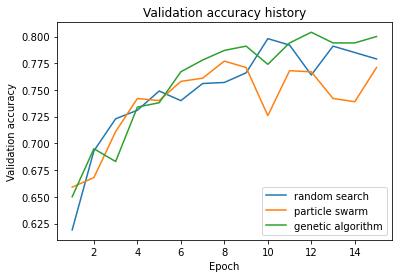

In [24]:
plt.figure()
plt.plot(np.arange(len(rd_valhistory))+1,rd_valhistory)
plt.plot(np.arange(len(ps_valhistory))+1,ps_valhistory)
plt.plot(np.arange(len(ga_valhistory))+1,ga_valhistory)
plt.legend(['random search','particle swarm','genetic algorithm'])
plt.title('Validation accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.savefig('ValHist_200.pdf')

Generate evolution graph

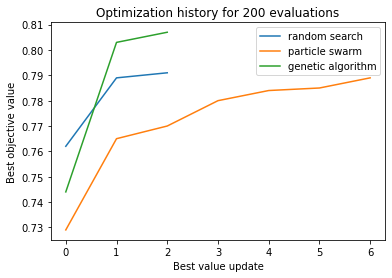

In [25]:
rd_history=load_obj('RandHistory200')
ps_history=load_obj('PSHistory200')
ga_history=load_obj('GAHistory200')

plt.figure()
plt.title('Optimization history for 200 evaluations')
plt.plot(np.arange(len(rd_history)),rd_history)
plt.plot(np.arange(len(ps_history)),ps_history)
plt.plot(np.arange(len(ga_history)),ga_history)
plt.xlabel('Best value update')
plt.ylabel('Best objective value')
plt.legend(['random search','particle swarm','genetic algorithm'])
plt.savefig('History_200.pdf')